## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [3]:
df = pd.read_csv("train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [127]:
df.head(3)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [128]:
df.shape

(200000, 59)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

In [130]:
df.carts_created_at.value_counts()                   

12/30/2020    2940
8/24/2020     1806
8/27/2020     1770
12/31/2020    1738
8/31/2020     1724
              ... 
11/16/2021      28
6/8/2020        24
6/6/2020        22
6/9/2020        13
6/5/2020        13
Name: carts_created_at, Length: 447, dtype: int64

In [131]:
df.communication_type.value_counts()                   

order    120786
web       49759
phone     28050
Name: communication_type, dtype: int64

Заменим все пропуски в данных

In [4]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

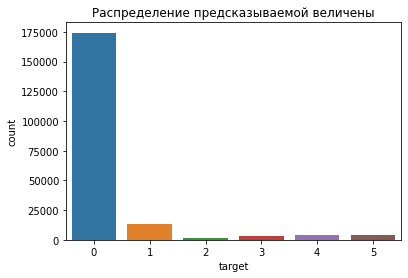

In [133]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

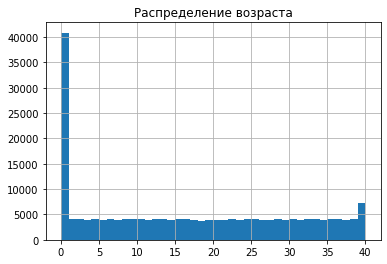

In [134]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [135]:
max(df["age_indicator"])

40.0

Взглянем на несколько величин сразу

In [136]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

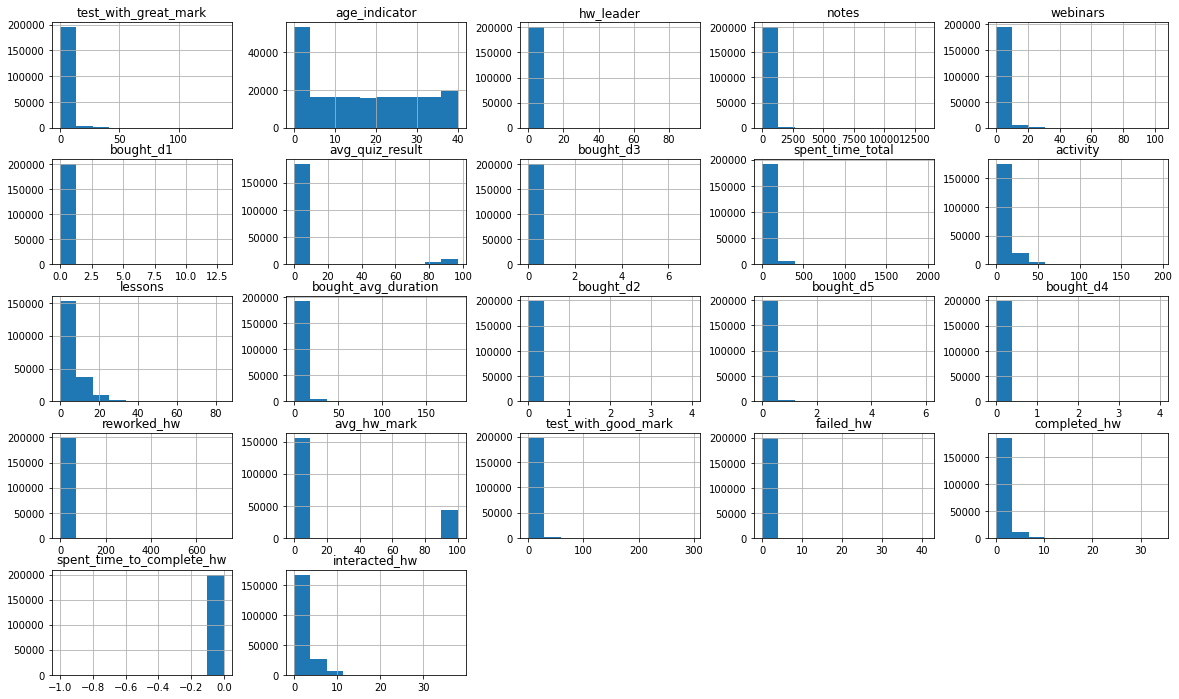

In [137]:
features = list(set(['age_indicator',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration']))

_ = df[features].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [138]:
df.spent_time_to_complete_hw.value_counts()

 0.0    199999
-1.0         1
Name: spent_time_to_complete_hw, dtype: int64

In [139]:
df.bought_d4.value_counts()

0    198694
1      1262
3        40
4         4
Name: bought_d4, dtype: int64

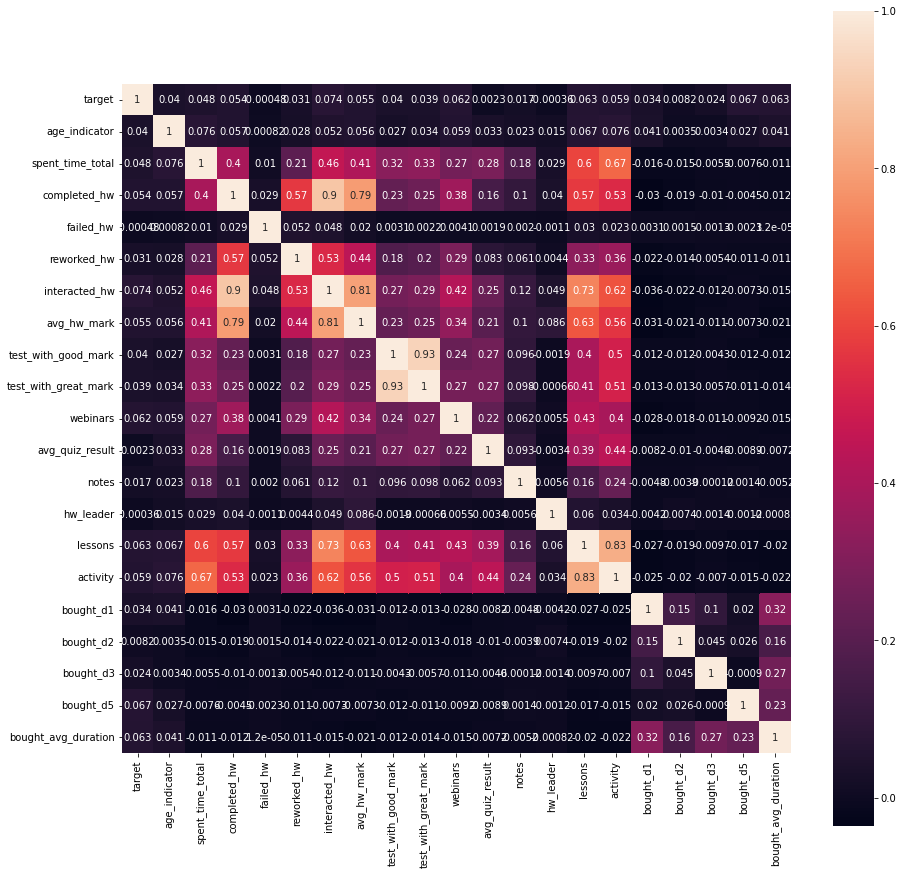

In [140]:
plt.rcParams['figure.figsize']=(15,15)

df_corr = df[["target",'age_indicator',
       'carts_created_at', 'spent_time_total',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3',
       'bought_d5', 'bought_avg_duration']]

g = sns.heatmap(df_corr.corr(), square = True, annot=True)

## Выделим выборки

In [5]:
df.dtypes[df.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')],
      dtype=object)

Поместим все столбцы object в массив, для их дальнейшего удаления

In [6]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [7]:
mass_object = np.append(mass_object, "target")

In [8]:
X = df.drop(mass_object, axis = 1)
y = df[["target"]]

In [145]:
X.shape

(200000, 49)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [10]:
clf = RandomForestClassifier(random_state=0)

In [11]:
clf.fit(X_train, y_train)

<ipython-input-11-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

## Оценка точности

In [12]:
pred = clf.predict(X_test)

In [13]:
y_test.head(3)

,target
119737,0
72272,0
158154,0


In [14]:
0.2* recall_score(y_test, pred, average='macro') + 0.8* precision_score(y_test, pred, average='macro')

0.7417353667606018

In [15]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
pd.DataFrame(pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,1
59998,0
